Целевой переменной является уровень дохода income (крайний правый столбец).
Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
from sklearn import linear_model

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Рассмотрим имеющиеся данные

In [3]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [4]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [5]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [6]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [8]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [9]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

Выбрав, как мне кажется значимы данные применяю OHE

In [10]:
X_dummies = pd.get_dummies(data.loc[:, ['gender', 'race', 'occupation', 'marital-status', 'education', 'workclass',]])

In [11]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 54 columns):
gender_Female                           48842 non-null uint8
gender_Male                             48842 non-null uint8
race_Amer-Indian-Eskimo                 48842 non-null uint8
race_Asian-Pac-Islander                 48842 non-null uint8
race_Black                              48842 non-null uint8
race_Other                              48842 non-null uint8
race_White                              48842 non-null uint8
occupation_?                            48842 non-null uint8
occupation_Adm-clerical                 48842 non-null uint8
occupation_Armed-Forces                 48842 non-null uint8
occupation_Craft-repair                 48842 non-null uint8
occupation_Exec-managerial              48842 non-null uint8
occupation_Farming-fishing              48842 non-null uint8
occupation_Handlers-cleaners            48842 non-null uint8
occupation_Machine-op-inspct         

In [12]:
y = data['income']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(C = 7)

In [15]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7479
        >50K       0.71      0.54      0.61      2290

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [17]:
y_pred_proba = model.predict_proba(X_test).tolist()

In [18]:
y_pred_proba[0]

[0.9819706285564144, 0.018029371443585594]

In [19]:
data.income[data.income == '<=50K'] = 0
data.income[data.income == '>50K'] = 1

/home/levprilutsky/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/levprilutsky/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Попробуем использовать градиентный спуск


In [20]:
y=data.income
x=X_dummies[['gender_Female','race_White','education_HS-grad','occupation_Exec-managerial']]
x.head(3)

,gender_Female,race_White,education_HS-grad,occupation_Exec-managerial
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0


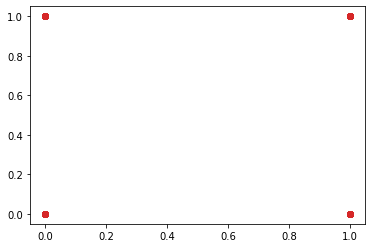

In [21]:
pylab.plot(x, y, 'o')
pylab.show()

In [22]:
# размер данных

m, n = np.shape(x)
m, n

(48842, 4)

In [23]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.]])

In [24]:
# y лист значений
y=y.astype('int')
y[:5]

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [25]:
# шаг алгоритма
alpha = 0.00007

In [26]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(5) # [ 1.  1.]
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = 1/(1+np.exp(-(np.dot(x, theta)))) # наш прогнозный таргет
        
        logloss = -y*np.log(hypothesis) - (1-y)*np.log(1-hypothesis)       
        J = np.sum(logloss)/(m) 
        print("J : ", J)    
        gradient = (hypothesis-y)@x         
        theta = theta - alpha * gradient 
    
    return theta

In [27]:
%%time
theta = gradient_descent_2(alpha, x, y, 600)

J :  2.1194938508005228
J :  0.6098457392979814
J :  0.5468135580529121
J :  0.5353909870249581
J :  0.5269133998791548
J :  0.5205043905496705
J :  0.515614707243348
J :  0.5118506840104347
J :  0.5089281860443756
J :  0.5066405970405182
J :  0.504836402304588
J :  0.5034034473287534
J :  0.5022579222564528
J :  0.5013366179037806
J :  0.5005914427015361
J :  0.49998550590646373
J :  0.49949029284593616
J :  0.4990836078594162
J :  0.49874806193123405
J :  0.4984699505129427
J :  0.4982384135528262
J :  0.498044801557446
J :  0.4978821934374015
J :  0.49774502714100055
J :  0.49762881478571974
J :  0.49752992158251763
J :  0.4974453932711526
J :  0.4973728206963886
J :  0.49731023300080424
J :  0.4972560129973161
J :  0.4972088298276886
J :  0.4971675851626736
J :  0.4971313700615823
J :  0.49709943026019826
J :  0.49707113815078124
J :  0.4970459700962835
J :  0.49702348801186963
J :  0.4970033243717762
J :  0.4969851699743678
J :  0.49696876393472594
J :  0.4969538854811727
J :  0.4

J :  0.49675742007418733
J :  0.49675742007390156
J :  0.4967574200736312
J :  0.49675742007337553
J :  0.49675742007313384
J :  0.49675742007290524
J :  0.4967574200726888
J :  0.49675742007248425
J :  0.4967574200722908
J :  0.4967574200721078
J :  0.4967574200719348
J :  0.49675742007177104
J :  0.4967574200716163
J :  0.49675742007146984
J :  0.4967574200713313
J :  0.49675742007120033
J :  0.4967574200710765
J :  0.4967574200709594
J :  0.4967574200708485
J :  0.4967574200707437
J :  0.4967574200706447
J :  0.49675742007055085
J :  0.49675742007046214
J :  0.4967574200703782
J :  0.4967574200702991
J :  0.49675742007022394
J :  0.49675742007015294
J :  0.49675742007008583
J :  0.49675742007002244
J :  0.49675742006996243
J :  0.49675742006990564
J :  0.4967574200698519
J :  0.49675742006980117
J :  0.49675742006975304
J :  0.49675742006970774
J :  0.4967574200696646
J :  0.49675742006962403
J :  0.4967574200695856
J :  0.49675742006954926
J :  0.4967574200695149
J :  0.49675742006

In [28]:
theta

array([-1.23127462, -1.27826918,  0.46739531, -0.67266655,  1.19255779])

In [29]:
hypothesis = 1/(1+np.exp(-(np.dot(x, theta))))
y_pred_results = []
for i in hypothesis:
    if i >= 0.5:
        y_pred_results.append(1)
    else:
        y_pred_results.append(0)

In [30]:
print(classification_report(y_pred_results,y))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     45616
           1       0.17      0.62      0.27      3226

    accuracy                           0.78     48842
   macro avg       0.57      0.70      0.57     48842
weighted avg       0.91      0.78      0.83     48842



Готовое решение

In [31]:
model = LogisticRegression()

In [32]:
%%time 

model.fit( x, y )

CPU times: user 96.4 ms, sys: 4.4 ms, total: 101 ms
Wall time: 99.3 ms


/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_predict = model.predict( x )

In [34]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     37155
           1       0.62      0.17      0.27     11687

    accuracy                           0.78     48842
   macro avg       0.70      0.57      0.57     48842
weighted avg       0.75      0.78      0.72     48842



In [35]:
model.intercept_, model.coef_

(array([-0.61502301]),
 array([[-0.61502301, -1.27725897,  0.46603009, -0.67237574,  1.19144444]]))